## Load the dataset

In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HR Data.csv')

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 1. Remove Unnecessary Columns

In [28]:
# Assuming 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours' are unnecessary
columns_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=columns_to_remove)

## 2. Rename Columns

In [29]:
# Example: Renaming some columns for better understanding
new_column_names = {
    'Age': 'age',
    'Attrition': 'attrition',
    'BusinessTravel': 'business_travel',
    'DailyRate': 'daily_rate',
    'Department': 'department',
    'DistanceFromHome': 'distance_from_home',
    'Education': 'education',
    'EducationField': 'education_field',
    'EnvironmentSatisfaction': 'environment_satisfaction',
    'Gender': 'gender',
    'HourlyRate': 'hourly_rate',
    'JobInvolvement': 'job_involvement',
    'JobLevel': 'job_level',
    'JobRole': 'job_role',
    'JobSatisfaction': 'job_satisfaction',
    'MaritalStatus': 'marital_status',
    'MonthlyIncome': 'monthly_income',
    'MonthlyRate': 'monthly_rate',
    'NumCompaniesWorked': 'num_companies_worked',
    'OverTime': 'overtime',
    'PercentSalaryHike': 'percent_salary_hike',
    'PerformanceRating': 'performance_rating',
    'RelationshipSatisfaction': 'relationship_satisfaction',
    'StockOptionLevel': 'stock_option_level',
    'TotalWorkingYears': 'total_working_years',
    'TrainingTimesLastYear': 'training_times_last_year',
    'WorkLifeBalance': 'work_life_balance',
    'YearsAtCompany': 'years_at_company',
    'YearsInCurrentRole': 'years_in_current_role',
    'YearsSinceLastPromotion': 'years_since_last_promotion',
    'YearsWithCurrManager': 'years_with_curr_manager'
}
df = df.rename(columns=new_column_names)

## 3. Eliminate Redundant Entries

In [30]:
df = df.drop_duplicates()

## 4. Sanitize Specific Columns

In [31]:
# Example: Strip whitespace and convert to lower case for object columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.strip().str.lower()

## 5. Eliminate NaN Values

In [32]:
# Since the dataset has no NaN values based on the info provided, this step can be skipped.
# If it had, you could drop or fill NaN values as needed
# df = df.dropna() or df = df.fillna(method='ffill')

## 6. Additional Changes

In [33]:
# Example: Convert a date column to datetime format (if applicable)
# df['date_column'] = pd.to_datetime(df['date_column'])

In [34]:
# Example: Normalize numeric columns (optional, based on analysis needs)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Save the cleaned dataset

In [35]:
df.to_csv('cleaned_HR_data.csv', index=False)

# Display cleaned info about the dataset
print("Cleaned DataFrame info:")
df.info()

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   education_field             1470 non-null   object
 8   environment_satisfaction    1470 non-null   int64 
 9   gender                      1470 non-null   object
 10  hourly_rate                 1470 non-null   int64 
 11  job_involvement             1470 non-null   int64 
 12  job_level                   1470 non-null   int64 
 13  job_role                

In [36]:
df.isnull()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_HR_data.csv')

# Ensure that the categorical columns are of type 'category'
categorical_columns = [
    'attrition', 'business_travel', 'department', 'education_field',
    'gender', 'job_role', 'marital_status', 'overtime'
]
for column in categorical_columns:
    df[column] = df[column].astype('category')

## 1. Basic Statistics and Overview

In [38]:
print("DataFrame Head:")
print(df.head())

print("\nBasic Statistics:")
print(df.describe())

print("\nCategorical Columns Overview:")
print(df.describe(include=['category']))

DataFrame Head:
   age attrition    business_travel  daily_rate              department  \
0   41       yes      travel_rarely        1102                   sales   
1   49        no  travel_frequently         279  research & development   
2   37       yes      travel_rarely        1373  research & development   
3   33        no  travel_frequently        1392  research & development   
4   27        no      travel_rarely         591  research & development   

   distance_from_home  education education_field  environment_satisfaction  \
0                   1          2   life sciences                         2   
1                   8          1   life sciences                         3   
2                   2          2           other                         4   
3                   3          4   life sciences                         4   
4                   2          1         medical                         1   

   gender  ...  performance_rating  relationship_satisfaction  \

## 2. Attrition Analysis

In [39]:
print("\nAttrition Distribution:")
print(df['attrition'].value_counts())


Attrition Distribution:
attrition
no     1233
yes     237
Name: count, dtype: int64


## Plot attrition distribution

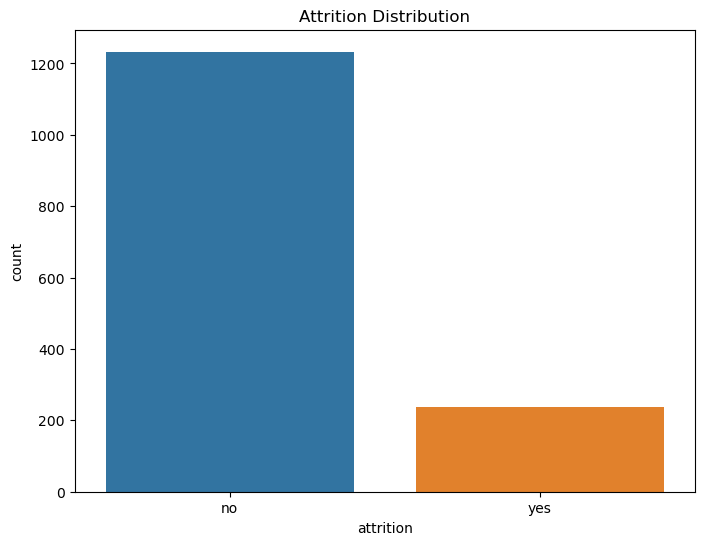

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='attrition')
plt.title('Attrition Distribution')
plt.show()

## 3. Demographic Analysis

In [41]:
# Gender distribution
print("\nGender Distribution:")
print(df['gender'].value_counts())


Gender Distribution:
gender
male      882
female    588
Name: count, dtype: int64


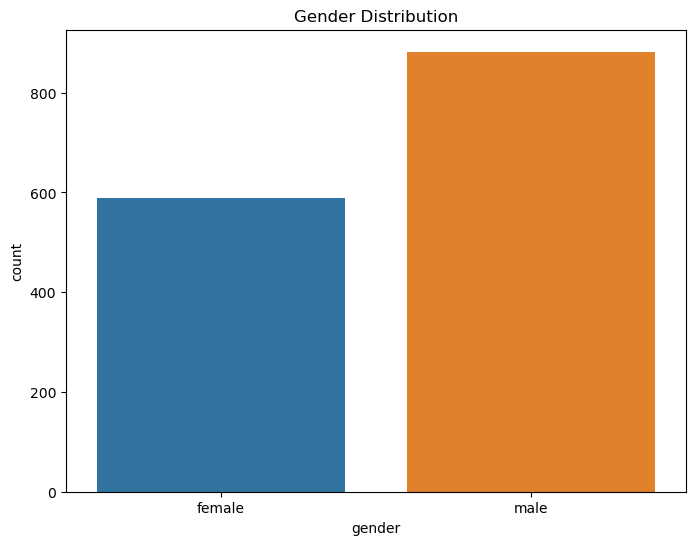

In [42]:
# Plot gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

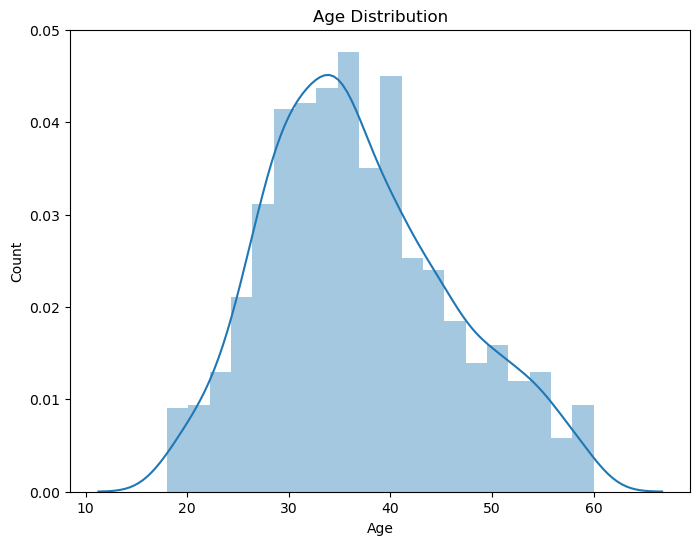

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe and it has a column named 'age'
plt.figure(figsize=(8, 6))
sns.distplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## 4. Job Satisfaction and Performance

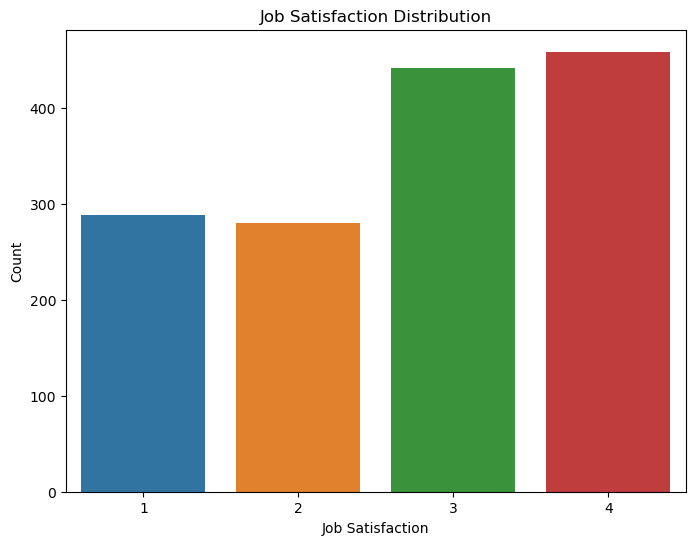

In [49]:
# Job Satisfaction distribution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'job_satisfaction' column is treated as categorical
df['job_satisfaction'] = df['job_satisfaction'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='job_satisfaction')
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()


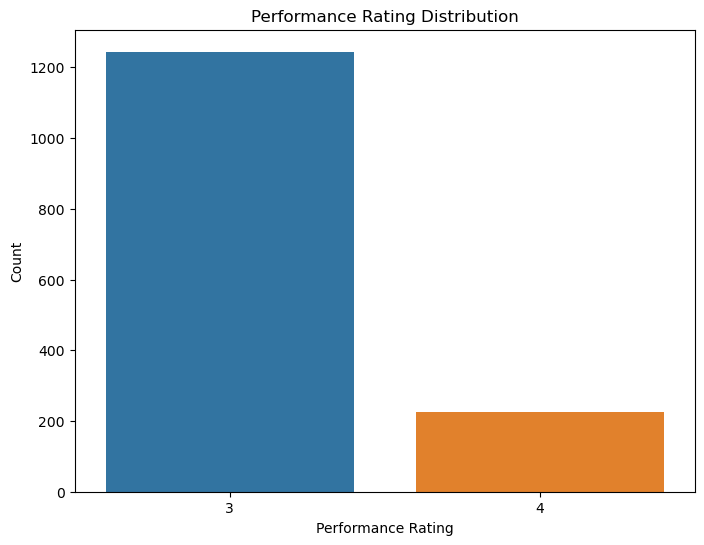

In [53]:
# Performance Rating distribution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'performance_rating' column is treated as categorical
df['performance_rating'] = df['performance_rating'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='performance_rating')
plt.title('Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()


## 5. Attrition by Department

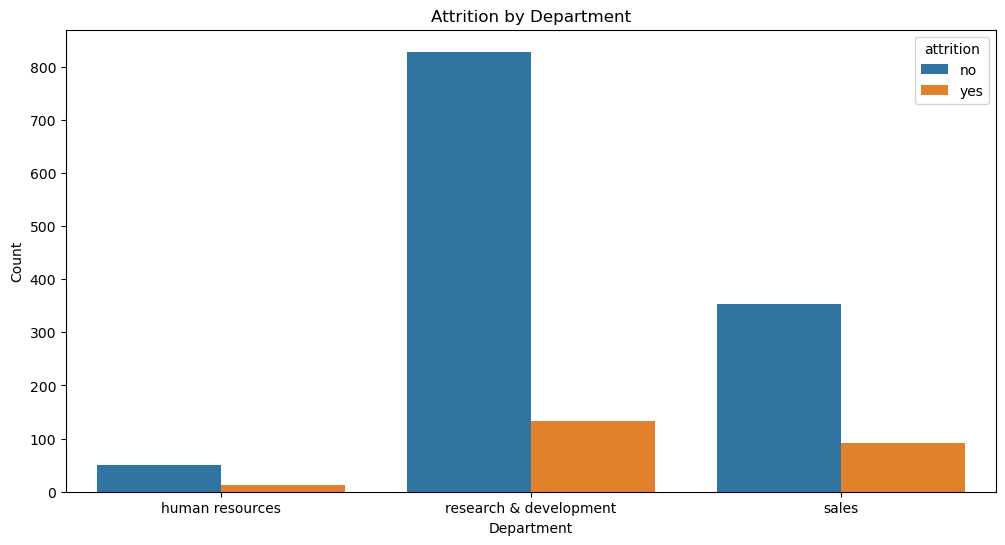

In [62]:
# Attrition by Department
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='department', hue='attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

## 6. Monthly Income Distribution

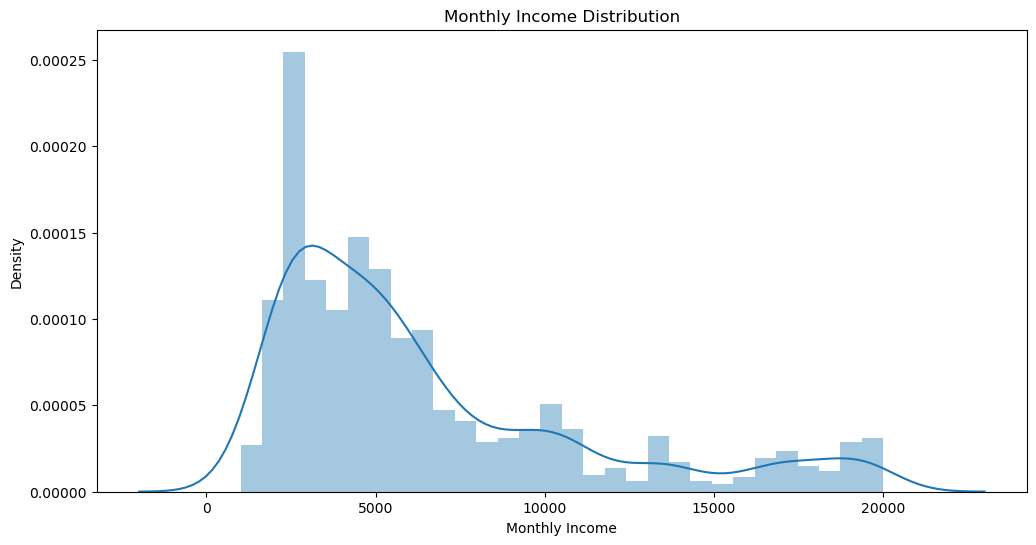

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Monthly Income Distribution
plt.figure(figsize=(12, 6))
sns.distplot(df['monthly_income'], bins=30, kde=True)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.show()


## 7. Job Role and Attrition

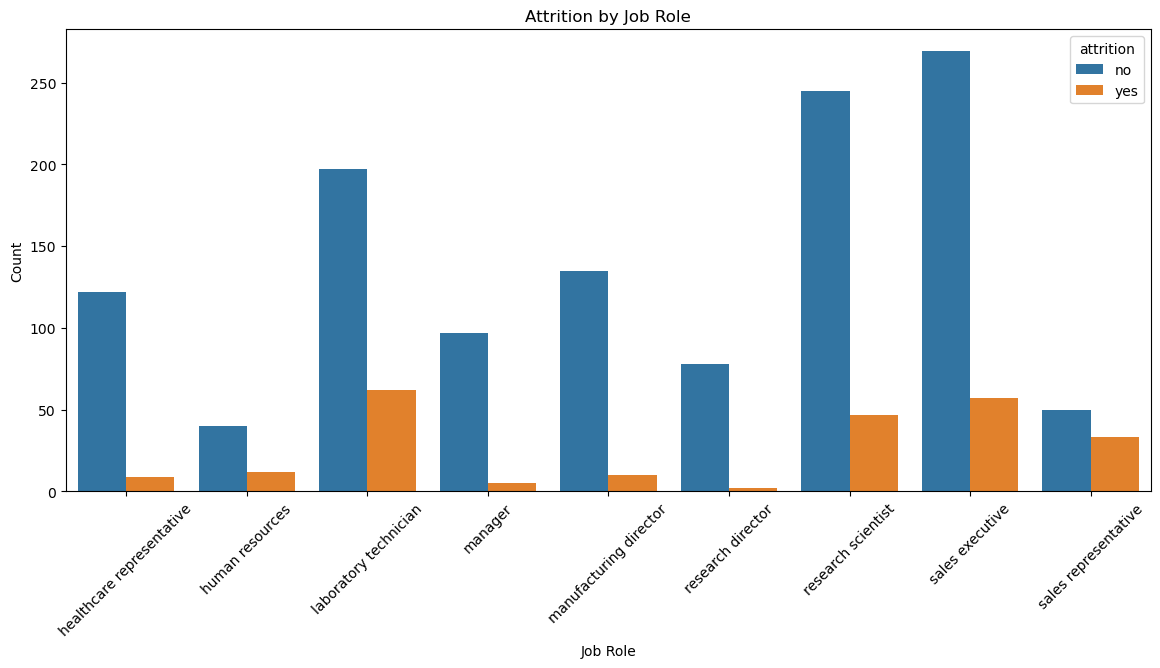

In [64]:
# Job Role and Attrition
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='job_role', hue='attrition')
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()


## 8. Attrition by Business Travel Frequency

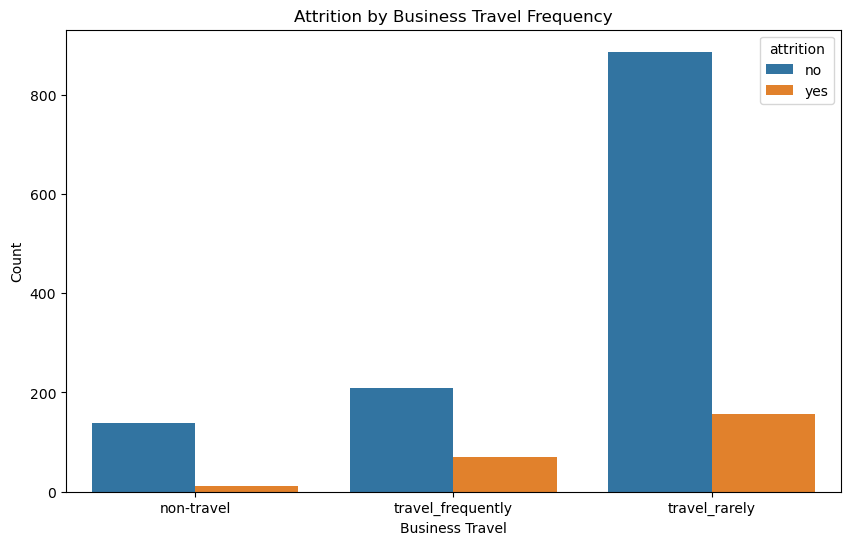

In [70]:
# Attrition by Business Travel Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='business_travel', hue='attrition')
plt.title('Attrition by Business Travel Frequency')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()
